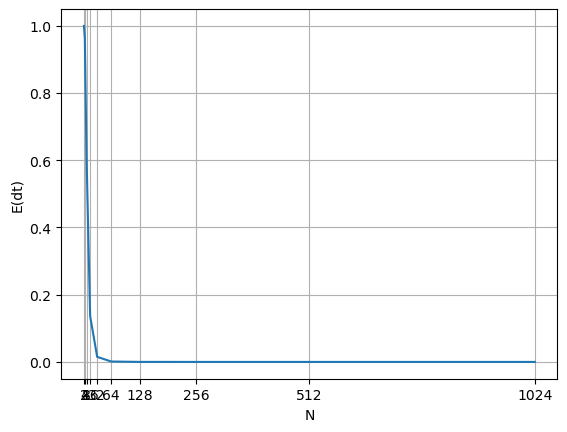

<Figure size 1000x420 with 0 Axes>

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def f_1(u, v):
    return -4 * u + 6 * v


def f_2(u, v):
    return -3 * u + 5 * v


def solve_oed_runge_kutta(a, b, f_1, f_2, n, u_a, v_a):
    dt = (b - a) / n
    t = [a + i * dt for i in range(n + 1)]
    u = np.zeros(n + 1)
    v = np.zeros(n + 1)

    u[0] = u_a
    v[0] = v_a

    for i in range(n):
        k_1 = f_1(u[i], v[i])
        l_1 = f_2(u[i], v[i])

        k_2 = f_1(u[i] + (1 / 2) * dt * k_1, v[i] + (1 / 2) * dt * l_1)
        l_2 = f_2(u[i] + (1 / 2) * dt * k_1, v[i] + (1 / 2) * dt * l_1)

        k_3 = f_1(u[i] + (1 / 2) * dt * k_2, v[i] + (1 / 2) * dt * l_2)
        l_3 = f_2(u[i] + (1 / 2) * dt * k_2, v[i] + (1 / 2) * dt * l_2)

        k_4 = f_1(u[i] + dt * k_3, v[i] + dt * l_3)
        l_4 = f_2(u[i] + dt * k_3, v[i] + dt * l_3)
        u[i + 1] = u[i] + (1 / 6) * dt * (k_1 + 2 * (k_2 + k_3) + k_4)
        v[i + 1] = v[i] + (1 / 6) * dt * (l_1 + 2 * (l_2 + l_3) + l_4)

    return (u, v)




def culc_err(n):
    u_runge,v_rung=solve_oed_runge_kutta(0,10,f_1,f_2,n,1,0)
    u=[2*np.exp(-10*t/n)-np.exp(2*10*t/n) for t in range(n+1)]
    v=[np.exp(-10*t/n)-np.exp(2*10*t/n) for t in range(n+1)]
    return np.max(np.abs(np.concatenate([u-u_runge,v-v_rung])))/np.max(np.abs(np.concatenate([u,v])))

x = [2**i for i in range(1, 11)]

y=[culc_err(i) for i in x]

plt.plot(x,y)
plt.xticks(x)
plt.grid()
plt.xlabel("N")
plt.ylabel("E(dt)")
# plt.plot(x,y_2)
plt.savefig("1SC22317Y02d01.pdf")
plt.show()
